In [1776]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1777]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [1778]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [1779]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [1780]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [1781]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [1782]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [1783]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [1784]:
# Find the most recent date in the data set.
recentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recentdate)

('2017-08-23',)


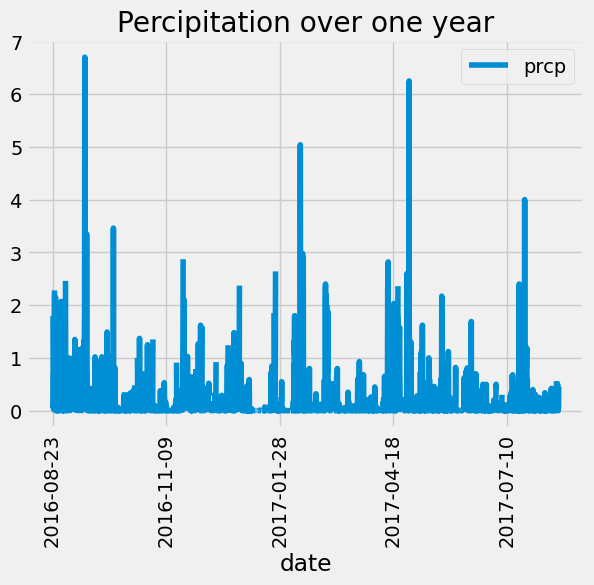

In [1785]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - relativedelta(years=1)
# Perform a query to retrieve the data and precipitation scores
dateandscores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
dateandscoresdf = pd.DataFrame(dateandscores)
dateandscoresdf.set_index('date', inplace=True)
# Sort the dataframe by date
dateandscoresdf = dateandscoresdf.sort_index()
dateandscoresdf.head()
# Use Pandas Plotting with Matplotlib to plot the data
dateandscoresdf.plot()
plt.title("Percipitation over one year")
plt.xticks(rotation='vertical')
plt.show()

In [1786]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [1787]:
# Design a query to calculate the total number stations in the dataset
stationtotal = session.query(Station.station).count()
print(stationtotal)

9


In [1788]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
from sqlalchemy import func, desc
mostactive = session.query(Measurement.station,              
    func.count(Measurement.station).label('qty')
    ).group_by(Measurement.station
    ).order_by(desc('qty')).all()
# List the stations and the counts in descending order.
print(mostactive)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [1789]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

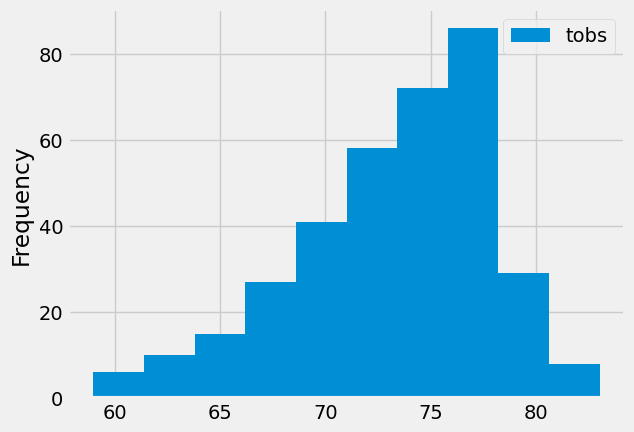

In [1790]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempdata = session.query(Measurement.tobs).filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').all()
tempdatadf = pd.DataFrame(tempdata)
tempdatadf.plot.hist()

# Close session

In [1791]:
# Close Session
session.close()